## Partie 1 – Exploratory Data Analysis(EDA)

## Objectifs 

- Comprendre la forme et le contenu du dataset
- Identifier les anomalies, les valeurs aberrantes ou manquantes
- Analyser la distribution des textes et des classes

## Questions à traiter 

- Quelle est la forme du DataFrame ?
- Y a-t-il des valeurs manquantes ?
- Des doublons ?
- Quelles colonnes vont nous être utiles ?
- Existe-t-il des incohérences ou des outliers ?
- Y a-t-il des tweets anormalement courts ou longs ?
- Quelle est la répartition de la variable cible ?
- En regardant des tweets aléatoires, la cible semble-t-elle prévisible ?

In [38]:
# Importation des bibliothèques nécessaires à l'exploration du dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FORME DU DATASET

In [39]:
# Chargement du dataset
df = pd.read_csv('../data/tweets.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [40]:
# Affichage des informations générales et des statistiques descriptives du dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


VALEURS MANQUANTES

In [41]:
# Valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
keyword       61
location    2533
dtype: int64


DONNEES DUPLIQUEES

In [42]:
# Données dupliquées
duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicates}")

Nombre de lignes dupliquées : 0


COLONNES UTILES POUR LA MODELISATION

In [43]:
# Nom des colonnes
print("Nom des colonnes :")
print(df.columns)

Nom des colonnes :
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [44]:
# Types de données
print("Types de données :")
print(df.dtypes)

Types de données :
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [45]:
# Nombre de lignes et de colonnes
print(f"Nombre de lignes : {df.shape[0]}, Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 7613, Nombre de colonnes : 5


In [46]:
# Valeurs uniques par colonne
print("Valeurs uniques par colonne :")
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} valeurs uniques")

Valeurs uniques par colonne :
id: 7613 valeurs uniques
keyword: 221 valeurs uniques
location: 3341 valeurs uniques
text: 7503 valeurs uniques
target: 2 valeurs uniques


In [47]:
# Definir les colonnes utiles pour la modélisation et pourquoi elles sont importantes
# 'text' : Contient le texte des tweets, essentiel pour l'analyse de sentiment.
# 'target' : Variable cible pour la classification, indique si le tweet est positif ou négatif.
useful_columns = ['text', 'target']
print("Colonnes utiles pour la modélisation :")
print(useful_columns)

Colonnes utiles pour la modélisation :
['text', 'target']


INCOHERENCES ET OUTLIERS

TWEETS ANORMALEMENT COURTS OU LONG

In [48]:
# Tweets anormalement courts ou longs
print("TWEETS ANORMALEMENT COURTS OU LONGS")
short_tweets = df[df['text'].str.len() < 10]
long_tweets = df[df['text'].str.len() > 280]
print(f"Nombre de tweets anormalement courts (< 10 caractères) : {len(short_tweets)}")
print(f"Nombre de tweets anormalement longs (> 280 caractères) : {len(long_tweets)}")

TWEETS ANORMALEMENT COURTS OU LONGS
Nombre de tweets anormalement courts (< 10 caractères) : 9
Nombre de tweets anormalement longs (> 280 caractères) : 0


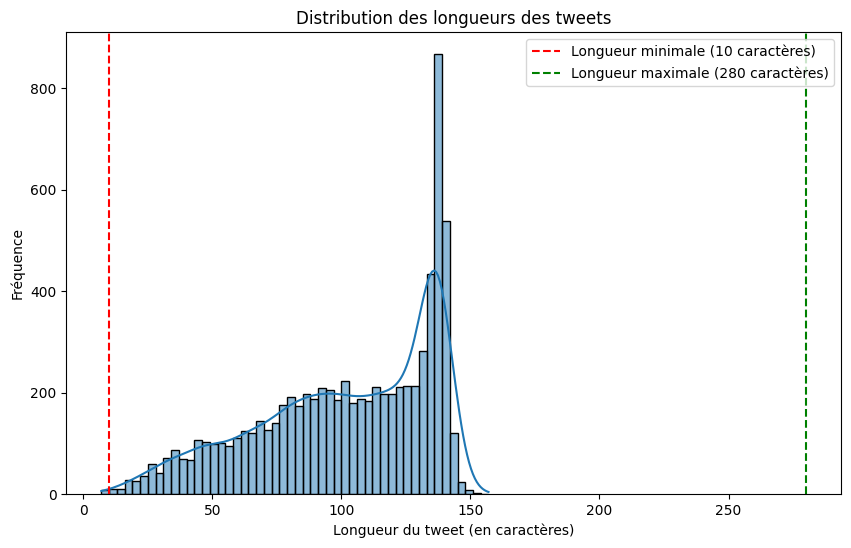

In [49]:
# Visualisation des longueurs des tweets
plt.figure(figsize=(10, 6))
sns.histplot(df['text'].str.len(), bins=50, kde=True)
plt.title('Distribution des longueurs des tweets')
plt.xlabel('Longueur du tweet (en caractères)')
plt.ylabel('Fréquence')
plt.axvline(x=10, color='red', linestyle='--', label='Longueur minimale (10 caractères)')
plt.axvline(x=280, color='green', linestyle='--', label='Longueur maximale (280 caractères)')
plt.legend()
plt.show()

REPARTITION DE LA VARIABLE CIBLE

Distribution de la variable cible 'target' :


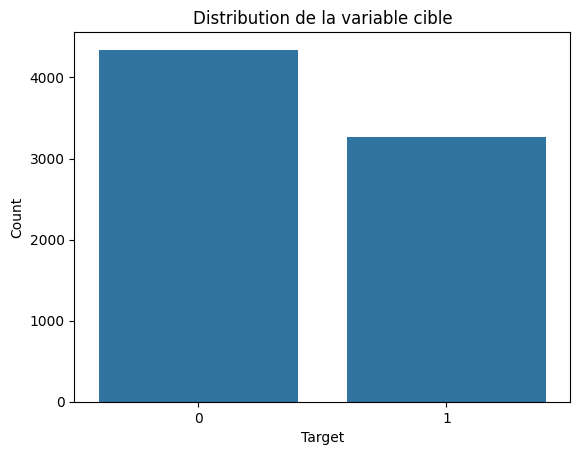

In [50]:
# Variable cible
print("Distribution de la variable cible 'target' :")
sns.countplot(x='target', data=df)
plt.title('Distribution de la variable cible')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

TWEETS ALEATOIRE --> CIBLE PREVISIBLE ?

TWEETS ALEATOIRE --> CIBLE PREVISIBLE ?
Exemples de tweets aléatoires avec leur cible :
Tweet: Services are returning to normal #SouthLine after a medical emergency at Yennora and urgent track equipment repairs at Cabramatta earlier., Cible: 1
Tweet: Being able to stay out of work this week to take online courses for the Property and Casualty StateÛ_ https://t.co/jmD7zwKSDM, Cible: 0
Tweet: Love skiing, Cible: 0
Tweet: EE recalls Power Bar battery packs after explosion in student's bedroom http://t.co/EKWTiHlwuf, Cible: 1
Tweet: Tonight we have attended a fire in Romford with @LondonFire thankfully no injuries http://t.co/iyjeJop2WI, Cible: 1
Tweet: INFOGRAPHIC: At least 20 Turkish security officials killed in PKK and ISIS terror attacks since Suruc suicide bombing http://t.co/UvAOJzcYcZ, Cible: 1
Tweet: #NASA announced that a massive #solar storm is headed straight for us: http://t.co/CM5u55MiOl, Cible: 1
Tweet: Homeless Man Traveling Across USA With 11 Stray Dogs He Rescued Gets A H

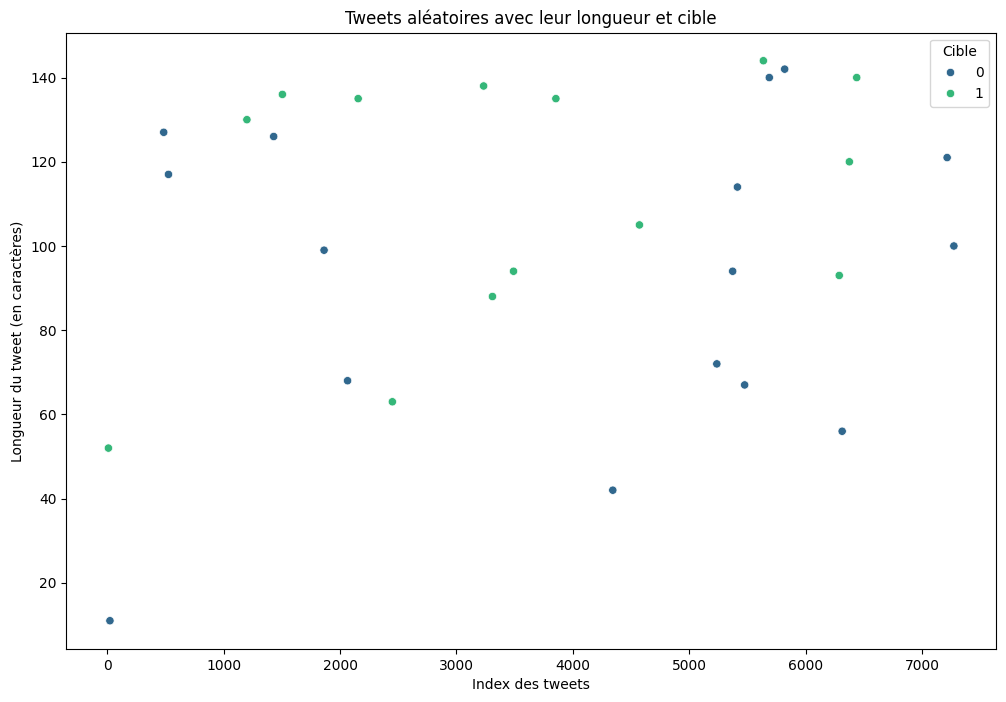

In [51]:
# Vérification de la prévisibilité de la cible
print("TWEETS ALEATOIRE --> CIBLE PREVISIBLE ?")

# Affichage de quelques tweets aléatoires avec leur cible
random_tweets = df.sample(30)
print("Exemples de tweets aléatoires avec leur cible :")
for index, row in random_tweets.iterrows():
    print(f"Tweet: {row['text']}, Cible: {row['target']}")

# Visualisation des tweets aléatoires
plt.figure(figsize=(12, 8))
sns.scatterplot(x=random_tweets.index, y=random_tweets['text'].str.len(), hue=random_tweets['target'], palette='viridis')
plt.title('Tweets aléatoires avec leur longueur et cible')
plt.xlabel('Index des tweets')
plt.ylabel('Longueur du tweet (en caractères)')
plt.legend(title='Cible')
plt.show()